Name: `Vicky Guo`

Collaborators: 

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this problem set, we will continue to use data on animals at shelters in the city of [Long Beach, California](https://en.wikipedia.org/wiki/Long_Beach,\_California) that we used in the previous problem set. The data can be found in the `animal_intakes_and_outcomes.csv` file. You can find more information on this data [here](https://web.archive.org/web/20230929001208/https://data.longbeach.gov/explore/dataset/animal-shelter-intakes-and-outcomes/information/?disjunctive.animal_type&disjunctive.primary_color&disjunctive.sex&disjunctive.intake_cond&disjunctive.intake_type&disjunctive.reason&disjunctive.outcome_type&disjunctive.outcome_subtype&disjunctive.intake_is_dead&disjunctive.outcome_is_dead).

### Problem 1: Describe the data (31 points)

Load the animal sheter data in and ensure you know the variables in the data. Keep the documentation of the dataset [nearby](https://web.archive.org/web/20230929001208/https://data.longbeach.gov/explore/dataset/animal-shelter-intakes-and-outcomes/information/?disjunctive.animal_type&disjunctive.primary_color&disjunctive.sex&disjunctive.intake_cond&disjunctive.intake_type&disjunctive.reason&disjunctive.outcome_type&disjunctive.outcome_subtype&disjunctive.intake_is_dead&disjunctive.outcome_is_dead).

In [2]:
#YOUR CODE HERE
data = pd.read_csv('Data/animal-shelter-intakes-and-outcomes.csv')
data.head()

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Intake Subtype,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
0,A002500,PENELOPE,DOG,WHITE,NaN,Spayed,2008-12-09,14.0,2017-07-02,NORMAL,...,POLICE,NaN,2017-07-03,"4600 E OCEAN BLVD, LONG BEACH, CA 90803",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
1,A226033,SNOOPY,DOG,WHITE,NaN,Neutered,2002-02-23,21.0,2017-10-08,NORMAL,...,OTC,NaN,2017-10-08,"13200 BLK ACORO PL, CERRITOS, CA 90703",CERRITOS,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
2,A234250,NINA,DOG,BR BRINDLE,NaN,Spayed,2008-08-01,15.0,2018-06-01,ILL SEVERE,...,CRUELTY,NaN,2018-06-07,"1900 W BURNETT ST, LONG BEACH, CA 90810",LONG BEACH,EUTHANASIA,ILL SEVERE,Alive on Intake,True,0
3,A238953,CECE,DOG,BUFF,NaN,Female,2013-07-17,10.0,2017-01-03,NORMAL,...,FIELD,NaN,2017-01-03,"400 E HULLET ST, LONG BEACH, CA 90805",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
4,A242600,BARBY,DOG,BLACK,NaN,Spayed,2007-10-27,15.0,2020-11-18,NORMAL,...,OTC,NaN,2020-11-19,"2000 BLK W COWLES ST, LONG BEACH, CA 90813",LONG BEACH,RESCUE,LIVELOVE,Alive on Intake,False,1


#### (a) Describe and summarize (4 points each)

Answer the following questions to describe and summarize the data:

- How many records are in the data?
- How many unique animals are in the data?
- How many types of animals are included in the data? What types are these?
- Across how many years does the data span? What are the years?
- How many primarily black cats less than 3 years of age were found in Los Alamitos?
- What is the most common primary/secondary color combination in the data (consider only when both colors are listed)?

In [3]:
data.shape #there are 39886 records in the data.

(39886, 21)

In [4]:
data['Animal Type'].unique() #there are 10 unique values for 'animal type', but only 5 of them are actual types of animals.
#They are 1)dog 2)cat 3)rabbit 4)bird 5)guinea pig.


array(['DOG', 'CAT', 'RABBIT', 'REPTILE', 'BIRD', 'OTHER', 'LIVESTOCK',
       'WILD', 'GUINEA PIG', 'AMPHIBIAN'], dtype=object)

In [5]:
data['Intake Date'].min() #the data spans from 2017-1-1 to 2023-9-27. It spans around 7 years.
data['Intake Date'].max() #the years are 2017, 2018, 2019, 2020, 2021, 2022, 2023.

'2023-09-27'

In [6]:
data[(data['Animal Type'] == 'CAT')&
(data['Primary Color'] == 'BLACK')&
(data['Age'] < 3.0)&
(data['Jurisdiction'] == 'LOS ALAMITOS')]
 #there are 16 black cats that are aged under 3 found in Los Alamitos.

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Intake Subtype,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
4325,A656207,*MISSY,CAT,BLACK,NaN,Spayed,2021-03-12,2.0,2021-04-12,UNDER AGE/WEIGHT,...,FIELD,NaN,2022-04-13,"3500 THOR AVE, LOS ALAMITOS, CA 90720",LOS ALAMITOS,ADOPTION,WEB,Alive on Intake,False,1
5327,A677720,ONYX,CAT,BLACK,NaN,Spayed,2022-04-15,1.0,2022-06-15,UNDER AGE/WEIGHT,...,OTC,NaN,2022-07-27,"33600 BLK HOWARD AVE, LOS ALAMITOS, CA 90720",LOS ALAMITOS,HOMEFIRST,NaN,Alive on Intake,False,1
12012,A677722,*MICAH,CAT,BLACK,WHITE,Neutered,2022-04-15,1.0,2022-06-15,UNDER AGE/WEIGHT,...,OTC,NaN,2022-08-03,"33600 BLK HOWARD AVE, LOS ALAMITOS, CA 90720",LOS ALAMITOS,TRANSFER,SPCALA,Alive on Intake,False,1
18708,A678721,*ASTER,CAT,BLACK,NaN,Female,2022-06-18,1.0,2022-07-01,NORMAL,...,OTC,NaN,2022-08-06,"11300 BLK LOS ALAMITOS BLVD, LOS ALAMITOS, CA ...",LOS ALAMITOS,HOMEFIRST,NaN,Alive on Intake,False,1
19627,A700185,*EMBER,CAT,BLACK,NaN,Female,2023-04-04,0.0,2023-06-04,NORMAL,...,OTC,NaN,2023-06-16,"3600 BLK GREEN AVE, LOS ALAMITOS, CA 90720",LOS ALAMITOS,TRANSFER,SPCALA,Alive on Intake,False,1
19686,A701237,*TUCKER,CAT,BLACK,WHITE,Neutered,2023-05-02,0.0,2023-06-20,UNDER AGE/WEIGHT,...,OTC,NaN,2023-08-30,11000 BLK DAVENPORT ROAD,LOS ALAMITOS,ADOPTION,WEB,Alive on Intake,False,1
25291,A677721,WYBIE,CAT,BLACK,WHITE,Neutered,2022-04-15,1.0,2022-06-15,UNDER AGE/WEIGHT,...,OTC,NaN,2022-07-17,"3600 BLK HOWARD AVE, LOS ALAMITOS, CA 90720",LOS ALAMITOS,ADOPTION,WEB,Alive on Intake,False,1
25348,A678719,*ARROW,CAT,BLACK,NaN,Male,2022-06-18,1.0,2022-07-01,NORMAL,...,OTC,NaN,2022-08-11,"11300 BLK LOS ALAMITOS BLVD, LOS ALAMITOS, CA ...",LOS ALAMITOS,RESCUE,CATPAWS,Alive on Intake,False,1
31967,A677719,*MAIA,CAT,BLACK,NaN,Spayed,2022-04-15,1.0,2022-06-15,UNDER AGE/WEIGHT,...,OTC,NaN,2022-08-03,"3600 BLK HOWARD AVE, LOS ALAMITOS, CA 90720",LOS ALAMITOS,TRANSFER,SPCALA,Alive on Intake,False,1
32918,A700183,*FIREWALL,CAT,BLACK,NaN,Male,2023-04-04,0.0,2023-06-04,NORMAL,...,OTC,NaN,2023-06-16,"3600 BLK GREEN AVE, LOS ALAMITOS, CA 90720",LOS ALAMITOS,TRANSFER,SPCALA,Alive on Intake,False,1


In [7]:
data1 = data['Primary Color']+ ' '+  data['Secondary Color'] #concatenate pri and sec colors
data1.unique()
data1.value_counts() #the most common color combination is black/white.

BLACK WHITE           4309
GRAY WHITE            1750
BROWN WHITE           1225
BRN TABBY WHITE       1064
WHITE BLACK            865
                      ... 
APRICOT CREAM            1
SLVR TABBY ORANGE        1
CREAM FAWN               1
CREAM PT CRM TABBY       1
CALICO DIL GRAY          1
Name: count, Length: 379, dtype: int64

#### (b) Reflect and question (7 points)

Comment on the questions (and answers) so far. Were you able to answer all of these questions? Are all questions well defined? Is the data good enough to answer all these?


* I answered all questions.
* Questions are generally well defined
  * Except the last one: What is the most common primary/secondary color combination in the data. This is because it did not specify if it wants both colors appearing or they need to appear in the order of primary/secondary.

* The data is generally good enough to answer all of them.
  * For the question asking about how long the data spans, the 'Outcome Type' column is in strings so I was not able to look at the maximum date for that column. 

### Problem 2: Age and seasonality (32 points)

#### (a) Typical ages (4 points)

What is the typical age of animals in the data?

In [8]:
data['Age'].value_counts() #checking how many animals have what age (distribution of age).
#the typical age os 6 years old.

#'Typical' meaning: I interpret it as appearing for the most number of times (mode).

Age
 6.0     4932
 5.0     4169
 4.0     4125
 3.0     3080
 1.0     3038
 2.0     2763
 0.0     2464
 7.0     2419
 8.0     1846
 9.0     1480
 10.0    1031
 11.0     778
 12.0     630
 13.0     532
 14.0     455
 15.0     300
 16.0     285
 17.0     181
 18.0     133
 19.0      84
 20.0      58
 21.0      29
 22.0      23
 23.0      11
 24.0       6
 25.0       5
 30.0       3
 26.0       1
 55.0       1
-7.0        1
Name: count, dtype: int64

This is not a very clear question so in your response it is important to qualify your choices. It is not quite clear what “the typical” age means. Please be sure you explain your analysis choices! Let’s try to answer a similar question instead: what is the median age of all animals?

In [9]:
data['Age'].median() #median age is 5.0 years old.

5.0

#### (b) Defining ages (6 points)

What definition of "typical age" did you use to answer part (a)? Did you look at ages by animal type? Did you do any specific exploration and description of this variable prior to using it? If not, please do so now. Is there any missing data? Are there any implausible or invalid entries?

In [10]:
#For (a), I used mode as the typical age. I did not explore much.

#There is one invalid value of -7.
data['Age'].isna().sum() #there are 5023 missing data for the age column.

5023

In [11]:
#checking for age distributions, no. of NaNs, mode, median, min, max
data[data['Animal Type'] == 'CAT']['Age'].value_counts()
data[data['Animal Type'] == 'CAT']['Age'].isna().sum() #622 missing values
data[data['Animal Type'] == 'CAT']['Age'].dropna().mode() #6
data[data['Animal Type'] == 'CAT']['Age'].dropna().median() #4
data[data['Animal Type'] == 'CAT']['Age'].dropna().min() #-7; invalid value
data[data['Animal Type'] == 'CAT']['Age'].dropna().max() #25

25.0

In [12]:
data[data['Animal Type'] == 'DOG']['Age'].value_counts()
data[data['Animal Type'] == 'DOG']['Age'].isna().sum() #241 missing values
data[data['Animal Type'] == 'DOG']['Age'].dropna().mode() #6
data[data['Animal Type'] == 'DOG']['Age'].dropna().median() #7
data[data['Animal Type'] == 'DOG']['Age'].dropna().min() #0
data[data['Animal Type'] == 'DOG']['Age'].dropna().max() #26

26.0

In [13]:
data[data['Animal Type'] == 'RABBIT']['Age'].value_counts()
data[data['Animal Type'] == 'RABBIT']['Age'].mode() #2
data[data['Animal Type'] == 'RABBIT']['Age'].median() #4
data[data['Animal Type'] == 'RABBIT']['Age'].min() #0
data[data['Animal Type'] == 'RABBIT']['Age'].max() #12
data[data['Animal Type'] == 'RABBIT']['Age'].isna().sum() #142 missing values

142

In [14]:
data[data['Animal Type'] == 'BIRD']['Age'].value_counts()
data[data['Animal Type'] == 'BIRD']['Age'].mode() #6
data[data['Animal Type'] == 'BIRD']['Age'].median() #4
data[data['Animal Type'] == 'BIRD']['Age'].min() #0
data[data['Animal Type'] == 'BIRD']['Age'].max() #16
data[data['Animal Type'] == 'BIRD']['Age'].isna().sum() #1716 missing values

1716

In [15]:
data[data['Animal Type'] == 'GUINEA PIG']['Age'].value_counts()
data[data['Animal Type'] == 'GUINEA PIG']['Age'].mode() #1
data[data['Animal Type'] == 'GUINEA PIG']['Age'].median() #3
data[data['Animal Type'] == 'GUINEA PIG']['Age'].min() #0
data[data['Animal Type'] == 'GUINEA PIG']['Age'].max() #10
data[data['Animal Type'] == 'GUINEA PIG']['Age'].isna().sum() #65

65

In [16]:
data[data['Animal Type'].isin(['WILD', 'AMPHIBIAN', 'REPTILE', 'LIVESTOCK', 'OTHER'])]['Age']
data[data['Animal Type'].isin(['WILD', 'AMPHIBIAN', 'REPTILE', 'LIVESTOCK', 'OTHER'])]['Age'].isna().count()
#4391 missing values for animal types that include wild, amphibian, reptile, livestock and other.
data[data['Animal Type'].isin(['WILD', 'AMPHIBIAN', 'REPTILE', 'LIVESTOCK', 'OTHER'])]['Age'].dropna().mode() #4
data[data['Animal Type'].isin(['WILD', 'AMPHIBIAN', 'REPTILE', 'LIVESTOCK', 'OTHER'])]['Age'].dropna().median() #4
data[data['Animal Type'].isin(['WILD', 'AMPHIBIAN', 'REPTILE', 'LIVESTOCK', 'OTHER'])]['Age'].dropna().min() #0
data[data['Animal Type'].isin(['WILD', 'AMPHIBIAN', 'REPTILE', 'LIVESTOCK', 'OTHER'])]['Age'].dropna().max() #55

55.0

#### (c) Ages by jurisdiction (5 points)

Now compute typical animal age by jurisdiction. Which three jurisdictions have the highest animal age? Be sure to justify you choice of age calculation and animal/jurisdiction grouping(s).

In [17]:
data['Jurisdiction'].unique() #checking for what jurisdictions there are

array(['LONG BEACH', 'CERRITOS', 'SIGNAL HILL', 'LOS ALAMITOS',
       'DISTRICT9', 'DISTRICT7', 'SEAL BEACH', 'OUT OF AREA', 'DISTRICT2',
       'SEAACA', 'LA COUNTY', 'DISTRICT8', 'DISTRICT3', 'DISTRICT5',
       'DISTRICT4', 'DISTRICT6', 'DISTRICT1', 'ORANGE CNTY',
       'GARDEN GROVE', 'WESTMINSTER', 'COSTA MESA', 'LA CITY', 'LA HABRA',
       nan, 'LAGUNA BEACH', 'IRVINE', 'TORRANCE AC'], dtype=object)

In [18]:
age_by_jurisdiction = data.groupby(['Jurisdiction', 'Animal Type'])['Age'] 
#group by jurisdiction and animal type, looking at age across these groups
age_by_jurisdiction.mean() #typical animal age for each animal type by jurisdiction

#definition of 'typical': mean because it is the average of the dataset
#jurisdiction groupings: by the column 'Jurisdiction'
#animal groupings: by the column 'Animal Type'

Jurisdiction  Animal Type
CERRITOS      BIRD            4.118421
              CAT             4.495855
              DOG             8.033113
              GUINEA PIG      5.000000
              OTHER           3.943182
                               ...    
TORRANCE AC   CAT            17.000000
WESTMINSTER   BIRD                 NaN
              CAT             2.666667
              DOG             5.000000
              RABBIT          4.000000
Name: Age, Length: 104, dtype: float64

In [19]:
top3 =  data.groupby('Jurisdiction')['Age'].mean().sort_values(ascending=False).head(3) 
print(top3)

#Torrance AC, District 3 and 2 have the highest animal age. 

Jurisdiction
TORRANCE AC    17.000000
DISTRICT3       8.375000
DISTRICT2       8.157895
Name: Age, dtype: float64


#### (d) Intake seasonality (10 points)

One may wonder whether intakes are in any way related to weather. We do not have weather information here but let’s analyze how intakes are related to seasons. Which seasons have the most intakes? Why might this be the case? In your communication of your analysis use one graphical visualization and one tabular respresentation of your findings.

In [20]:
import datetime as dt

In [21]:
intake_date = pd.to_datetime(data['Intake Date']) #converting to datetime

In [22]:
data['Month'] = intake_date.dt.month
data['Month'] #taking only month from YYYY-MM-DD

0         7
1        10
2         6
3         1
4        11
         ..
39881     9
39882     9
39883     9
39884     9
39885     9
Name: Month, Length: 39886, dtype: int32

In [23]:
intakes = data['Month'].value_counts().sort_index() #checking and sorting how many intakes per month from 1 to 12
intakes #this is the tabular result

Month
1     2380
2     2211
3     3069
4     3841
5     4679
6     4753
7     4116
8     4180
9     3684
10    2928
11    2181
12    1864
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

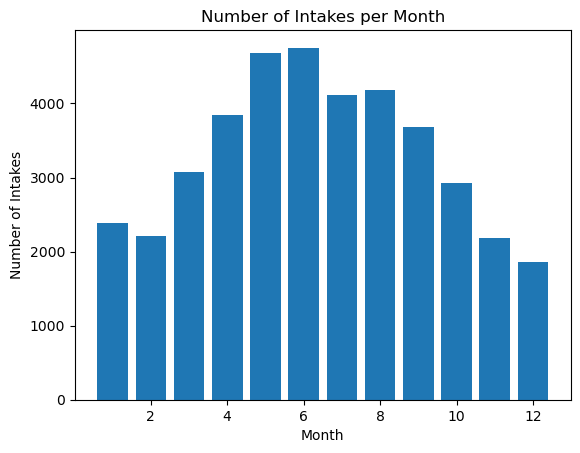

In [24]:
#this is graphical result
plt.bar(intakes.index, intakes.values)
plt.xlabel('Month')
plt.ylabel('Number of Intakes')
plt.title('Number of Intakes per Month')
plt.show

#June has the most intakes.
#This could be because the weather is warmer and there are more animal activities.

#### (e) Challenge your results (7 points)

After completing the exploratory analyses from Problem 2, do you have any concerns about your findings? How well defined was your original question? Do you still believe this question can be answered using this dataset? Comment on any ethical and/or privacy concerns you have with your analysis.

* Concerns for my findings:
  * I am not sure if my answers answered the 'typical age' question, because what if for the age of different animal types/jurisdiction, they have a different range/distribution etc and that are not reflected in my choice of 'typical age'. This may cause my findings to be not representitive for the entire data.
* How well defined was your original question?
  * Besides the definition of 'typical age', I have trouble defining 'Which three jurisdictions have the highest animal age?'. I am not sure which one to use to define 'highest animal age'. Also, I am not sure what they want with "Which three jurisdictions have the highest animal age?". Do I need to take animal types into account, if I do, how do I determine the highest animal age (eg. mean of all animal types within a jurisdiction? or max()?).
* Ethical and privacy considerations:
  * When hypothesizing why there is more intakes during June and lesser in winter, we need to be responsible about our insights by actually asking the shelter about reasons for high/low intakes. This is to avoid any unavoidable public reactions to these insights and to protect the shelter's privacy and authenticity of data insights.

### Problem 3: Returned pets in Long Beach (37 points)

For this problem, only consider instances where the jurisdiction is Long Beach and the outcome is that the animal was returned to owner.

#### (a) How many animals? (5 points)

How many records are there from Long Beach where the animal was returned to owner?

In [50]:
data_3 = data[(data['Jurisdiction'] == 'LONG BEACH') & (data['Outcome Type'] == 'RETURN TO OWNER')] #subsettig data
len(data_3) #3739 records where the animal was returned to owner in Long Beach.

3739

#### (b) How many types of animals? (5 points)

How many types of animals are in these records?

In [51]:
data_3['Animal Type'].unique() #8 types in total; only 5 of them (dog, cat, bird, rabbit, guinea pig) are actual animal types.

array(['DOG', 'CAT', 'BIRD', 'REPTILE', 'RABBIT', 'GUINEA PIG', 'OTHER',
       'WILD'], dtype=object)

#### (c) Which types of animals? (5 points)

Which types of animals are present in the entire data set that are not present when looking at instances where the jurisdiction is Long Beach and the outcome is that the animal was returned to owner?

In [52]:
data['Animal Type'].unique() #there are 10 unique values for 'animal type'.

#Livestock and amphibian are not present in data_3.

array(['DOG', 'CAT', 'RABBIT', 'REPTILE', 'BIRD', 'OTHER', 'LIVESTOCK',
       'WILD', 'GUINEA PIG', 'AMPHIBIAN'], dtype=object)

#### (d) How many of each type of animals? (5 points)

How many unique animals (not records) are there for each animal from Long Beach where the animal was returned to owner?

In [53]:
unique_animals = data_3.groupby('Animal Type')['Animal ID']

In [54]:
unique_animals.nunique() # number of unique IDs per type

Animal Type
BIRD            14
CAT            368
DOG           2993
GUINEA PIG       2
OTHER            1
RABBIT           7
REPTILE         15
WILD             1
Name: Animal ID, dtype: int64

#### (e) Decreases during COVID (10 points)

Did all animal types see a decrease in intakes during 2020 compared to their pre-2020 annual average? Which animal types saw the largest numerical drop and the largest percent drop?

In [55]:
intake_date_3 = pd.to_datetime(data_3['Intake Date'])
intake_date_3 #converting to datetime

0       2017-07-02
3       2017-01-03
6       2021-02-06
7       2018-12-01
8       2017-03-18
           ...    
39806   2023-08-30
39812   2023-08-31
39818   2023-09-03
39841   2023-09-13
39861   2023-09-19
Name: Intake Date, Length: 3739, dtype: datetime64[ns]

In [56]:
year = intake_date_3.dt.year #keeping only the year
year

0        2017
3        2017
6        2021
7        2018
8        2017
         ... 
39806    2023
39812    2023
39818    2023
39841    2023
39861    2023
Name: Intake Date, Length: 3739, dtype: int32

In [57]:
data_3 #checking if year variable in included

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive,Month
0,A002500,PENELOPE,DOG,WHITE,NaN,Spayed,2008-12-09,14.0,2017-07-02,NORMAL,...,NaN,2017-07-03,"4600 E OCEAN BLVD, LONG BEACH, CA 90803",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1,7
3,A238953,CECE,DOG,BUFF,NaN,Female,2013-07-17,10.0,2017-01-03,NORMAL,...,NaN,2017-01-03,"400 E HULLET ST, LONG BEACH, CA 90805",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1,1
6,A282135,WHISKEY,DOG,WHITE,NaN,Neutered,2003-07-07,20.0,2021-02-06,INJURED MILD,...,NaN,2021-02-06,"1830 E PACIFIC COAST HWY, LONG BEACH, CA 90806",LONG BEACH,RETURN TO OWNER,MICROCHIP,Alive on Intake,False,1,2
7,A285440,CHUIE,DOG,BROWN,NaN,Neutered,NaN,NaN,2018-12-01,NORMAL,...,NaN,2018-12-01,"30TH ST / PINE AVE, LONG BEACH, CA 90806",LONG BEACH,RETURN TO OWNER,WALKIN,Alive on Intake,False,1,12
8,A287459,PADFOOT,DOG,BLACK,NaN,Neutered,2009-02-09,14.0,2017-03-18,NORMAL,...,NaN,2017-03-18,"E SPRING ST / CLARK AVE, LONG BEACH, CA 90815",LONG BEACH,RETURN TO OWNER,PHONE,Alive on Intake,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39806,A705763,OSCAR,CAT,BRN TABBY,NaN,Male,2020-08-30,3.0,2023-08-30,ILL MILD,...,NaN,2023-09-02,"3100 BLK E ARTESIA BLVD, LB 90805",LONG BEACH,RETURN TO OWNER,WALKIN,Alive on Intake,False,1,8
39812,A705849,COCO,DOG,BROWN,NaN,Female,2022-08-31,1.0,2023-08-31,NORMAL,...,NaN,2023-08-31,2500 BLK CHESTNUT AVE LONG BEACH CA 90806,LONG BEACH,RETURN TO OWNER,WALKIN,Alive on Intake,False,1,8
39818,A706177,CARTER,DOG,WHITE,NaN,Neutered,2020-09-03,3.0,2023-09-03,NORMAL,...,NaN,2023-09-06,"3000 WOODRUFF AVE, LB 90808",LONG BEACH,RETURN TO OWNER,WALKIN,Alive on Intake,False,1,9
39841,A706730,GUTTA,DOG,BLACK,TAN,Male,2020-09-13,3.0,2023-09-13,NORMAL,...,NaN,2023-09-19,"3500 BLOCK SANTA FE AVE, LONG BEACH CA",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1,9


In [61]:
data_3['Year'].copy = year

In [62]:
before_covid = data_3[data_3['Year'] < 2020] #subsetting data where years are before covid

In [63]:
intakes_before_covid = before_covid.groupby('Animal Type')['Animal ID'] #intake per animal type before covid
intakes_before_covid.nunique() / 3 #taking the average for years 2017, 2018, 2019

Animal Type
BIRD         2.333333
CAT         62.666667
DOG        556.000000
RABBIT       1.333333
REPTILE      2.666667
WILD         0.333333
Name: Animal ID, dtype: float64

In [64]:
during_covid = data_3[data_3['Year'] == 2020] #subsetting data where year is covid

In [65]:
intakes_during_covid = during_covid.groupby('Animal Type')['Animal ID']
intakes_during_covid.nunique() #intakes per animal type during covid

Animal Type
BIRD         1
CAT         42
DOG        356
REPTILE      1
Name: Animal ID, dtype: int64

In [66]:
intakes_during_covid.nunique() - (intakes_before_covid.nunique()/3)
#The intake of all animals decreased during covid.
#Dogs saw the largest numerical drop.

Animal Type
BIRD        -1.333333
CAT        -20.666667
DOG       -200.000000
RABBIT            NaN
REPTILE     -1.666667
WILD              NaN
Name: Animal ID, dtype: float64

In [67]:
( intakes_during_covid.nunique() - (intakes_before_covid.nunique()/3) ) / (intakes_before_covid.nunique()/3)
#Rabbit and WILD experienced the most signficant percentage drop of 100%.

Animal Type
BIRD      -0.571429
CAT       -0.329787
DOG       -0.359712
RABBIT          NaN
REPTILE   -0.625000
WILD            NaN
Name: Animal ID, dtype: float64

#### (f) Reflect and Question (7 points)

What are your thoughts on the questions (and answers) for problem 3? Were you able to answer all of these questions? Are all questions well-defined? Is the data good enough to answer all these?

* I was able to answer all questions. However, some questions are not defined well:
  * For the how many types of animals question, I am not sure if 'Wild' or 'Reptile' could be counted as 'types of animals' because they represent different species within that animal type.
  * For the 'Which animal types saw the largest numerical drop and the largest percent drop?' questions, I am not sure which animal type saw the largest percentage drop from my answer. Does 'largest % drop' include animal types that does not have intake data during covid? or is it just for animal types that both have intake data for before and during covid?
* I have not found problems with the data so far, so I would say the data is good enough to answer all questions.